In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import wb
import matplotlib.pyplot as plt


In [2]:
wb.search('Inflation')

,id,name,unit,source,sourceNote,sourceOrganization,topics
6873,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",,World Development Indicators,Inflation as measured by the consumer price in...,"b'International Monetary Fund, International F...",Economy & Growth ; Financial Sector
6875,FP.FPI.TOTL.ZG,"Inflation, food prices (annual %)",,WDI Database Archives,,b'',
6877,FP.WPI.TOTL.ZG,"Inflation, wholesale prices (annual %)",,WDI Database Archives,,b'',
10988,NY.GDP.DEFL.87.ZG,"Inflation, GDP deflator (annual %)",,WDI Database Archives,,b'',
10989,NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)",,World Development Indicators,Inflation as measured by the annual growth rat...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10990,NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)",,World Development Indicators,Inflation as measured by the annual growth rat...,b'World Bank staff estimates based on World Ba...,Financial Sector


In [3]:
GDP_Current_LCU = 'NY.GDP.MKTP.CN'
GDP_Constant_LCU = 'NY.GDP.MKTP.KN'
BroadMoney = 'FM.LBL.BMNY.CN'
Inflation_GDP_Deflactor = 'NY.GDP.DEFL.KD.ZG'

indicators = [GDP_Current_LCU, GDP_Constant_LCU, BroadMoney, Inflation_GDP_Deflactor]
cols = {'NY.GDP.MKTP.CN': 'GDP_Current','NY.GDP.MKTP.KN': 'GDP_Constant', 'FM.LBL.BMNY.CN': 'Broad_Money', 'NY.GDP.DEFL.KD.ZG': 'Inflation' }

In [5]:
for id in indicators:
    df = wb.download(indicator=id, country='ARG', start=1960, end=2023)
    df = df.reset_index()
    df.rename(columns=cols, inplace=True)
    
    archivo_csv = f'csv_creados/{id}.csv'
    
   
    df.to_csv(archivo_csv, index=False)
    
    print(f'Se ha guardado "{archivo_csv}"')

/var/folders/n8/s5gn3hhs4z90dmrnk47r93fh0000gn/T/ipykernel_1674/2242863398.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=id, country='ARG', start=1960, end=2023)


Se ha guardado "csv_creados/NY.GDP.MKTP.CN.csv"


/var/folders/n8/s5gn3hhs4z90dmrnk47r93fh0000gn/T/ipykernel_1674/2242863398.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=id, country='ARG', start=1960, end=2023)


Se ha guardado "csv_creados/NY.GDP.MKTP.KN.csv"


/var/folders/n8/s5gn3hhs4z90dmrnk47r93fh0000gn/T/ipykernel_1674/2242863398.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=id, country='ARG', start=1960, end=2023)


Se ha guardado "csv_creados/FM.LBL.BMNY.CN.csv"
Se ha guardado "csv_creados/NY.GDP.DEFL.KD.ZG.csv"


/var/folders/n8/s5gn3hhs4z90dmrnk47r93fh0000gn/T/ipykernel_1674/2242863398.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator=id, country='ARG', start=1960, end=2023)


In [6]:
df.head(3)

,country,year,Inflation
0,Argentina,2023,133.839867
1,Argentina,2022,69.471240
2,Argentina,2021,53.840450


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    64 non-null     object 
 1   year       64 non-null     object 
 2   Inflation  63 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [8]:
archivos = ['csv_creados/NY.GDP.MKTP.CN.csv', 'csv_creados/NY.GDP.MKTP.KN.csv', 'csv_creados/FM.LBL.BMNY.CN.csv', 'csv_creados/NY.GDP.DEFL.KD.ZG.csv']
names = ['GDP_N', 'GDP_R', 'M', 'Inf']


for archivo, name in zip(archivos, names):
   
    df = pd.read_csv(archivo)
    df.drop(columns=['country'], inplace=True)
   
    globals()[f'df_{name}'] = df

In [9]:
df_GDP_N.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         64 non-null     int64  
 1   GDP_Current  64 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [10]:
df = df_GDP_N.merge(df_GDP_R, on=['year'], how='inner').merge(df_M, on=['year'], how='inner')

In [11]:
df['GDP_Constant'] = df['GDP_Constant'].astype(float)
df['year'] = pd.to_datetime(df['year'].astype(str) + '1231', format='%Y%m%d')
df = df.sort_values(by='year').reset_index(drop=True)

In [12]:
df.head(2)

,year,GDP_Current,GDP_Constant,Broad_Money
0,1960-12-31,0.131509,1.829320e+11,0.0278
1,1961-12-31,0.166807,1.928613e+11,0.0277


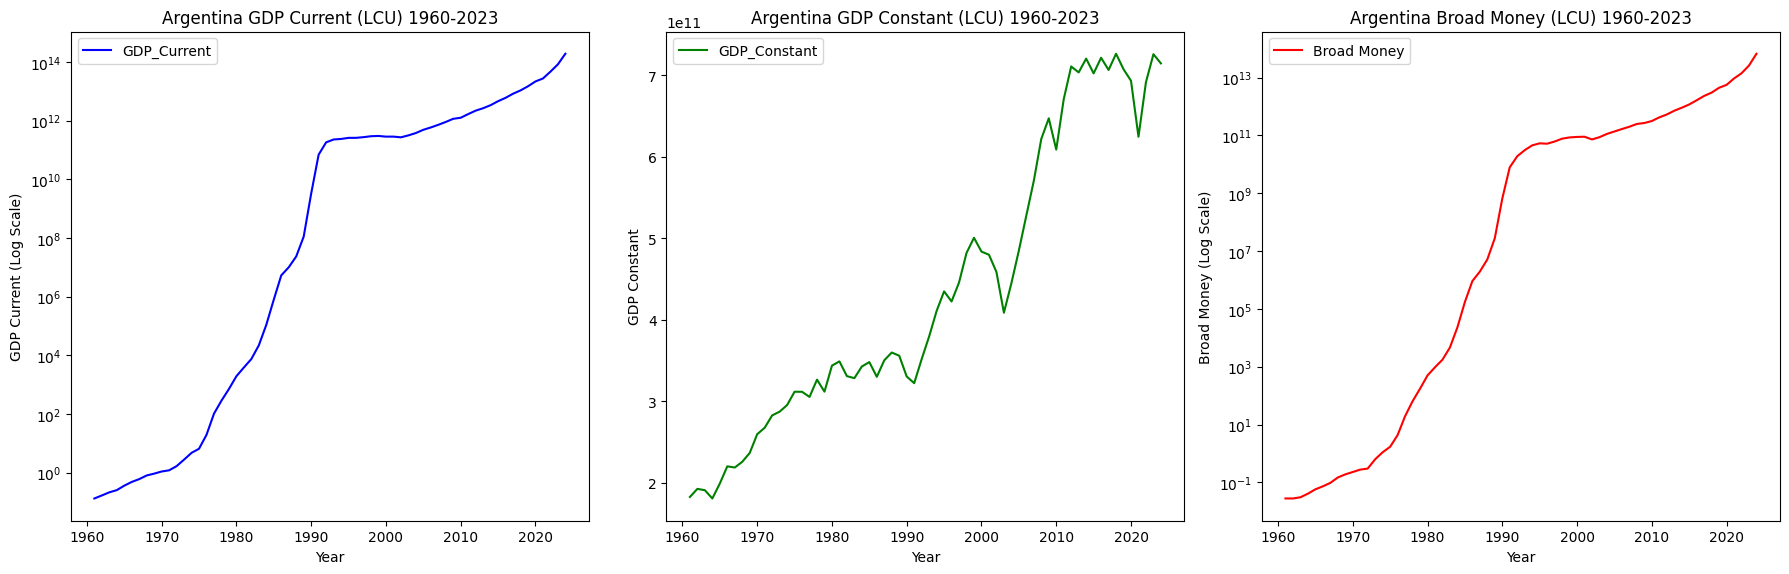

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].plot(df['year'], df['GDP_Current'], label='GDP_Current', color='blue')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('GDP Current (Log Scale)')
axs[0].set_title('Argentina GDP Current (LCU) 1960-2023')
axs[0].set_yscale('log')
axs[0].legend()

axs[1].plot(df['year'], df['GDP_Constant'], label='GDP_Constant', color='green')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('GDP Constant')
axs[1].set_title('Argentina GDP Constant (LCU) 1960-2023')
axs[1].legend()


axs[2].plot(df['year'], df['Broad_Money'], label='Broad Money', color='red')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Broad Money (Log Scale)')
axs[2].set_title('Argentina Broad Money (LCU) 1960-2023')
axs[2].set_yscale('log')
axs[2].legend()


plt.tight_layout()


plt.show()

In [14]:
df.to_csv('csv_creados/Data_Argentina_Absolute_Terms.csv', index=False)

In [15]:
df_arc = df.copy()
for col in df.columns[1:]: 
    df_arc[col] = df[col].pct_change()

In [16]:
df_arc.head(2)

,year,GDP_Current,GDP_Constant,Broad_Money
0,1960-12-31,NaN,NaN,NaN
1,1961-12-31,0.26841,0.054278,-0.003597


In [17]:
df_Inf['Inflation'] = df_Inf['Inflation'] / 100
df_Inf['year'] = pd.to_datetime(df_Inf['year'].astype(str) + '1231', format='%Y%m%d')
df_Inf = df_Inf.sort_values(by='year').reset_index(drop=True)


In [18]:
df_arc = df_arc.merge(df_Inf, on=['year'], how='inner')

In [19]:
df_arc.isnull().sum()

year            0
GDP_Current     1
GDP_Constant    1
Broad_Money     1
Inflation       1
dtype: int64

In [20]:
df_arc = df_arc.dropna()
df_arc = df_arc.reset_index(drop=True)

In [21]:
df_arc.head(2)

,year,GDP_Current,GDP_Constant,Broad_Money,Inflation
0,1961-12-31,0.268410,0.054278,-0.003597,0.203107
1,1962-12-31,0.277738,-0.008520,0.101083,0.288718


Ecuation of Exchange:

m v = p q

p q = gdp

v = gdp - m

* small letters for variables in anual rate of change

In [22]:
df_arc['Velocity_Money'] = df_arc['GDP_Current'] - df_arc['Broad_Money']

In [23]:
df_arc.to_csv('csv_creados/Data_Argentina_Relative_Terms.csv',index=False) 

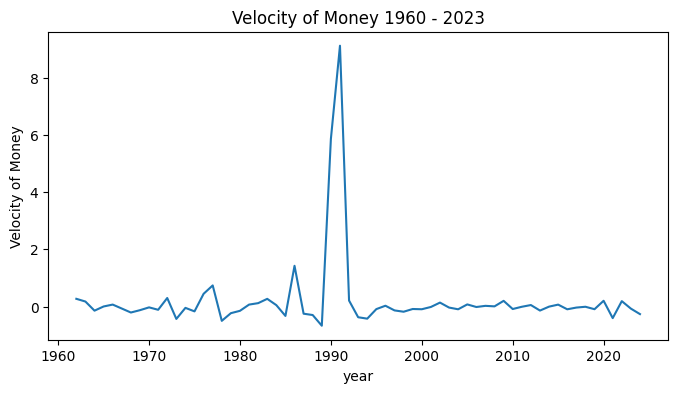

In [24]:
plt.figure(figsize=(8, 4))
plt.title('Velocity of Money 1960 - 2023')
plt.xlabel('year')
plt.ylabel('Velocity of Money')

plt.plot(df_arc['year'], df_arc['Velocity_Money'])

plt.show()

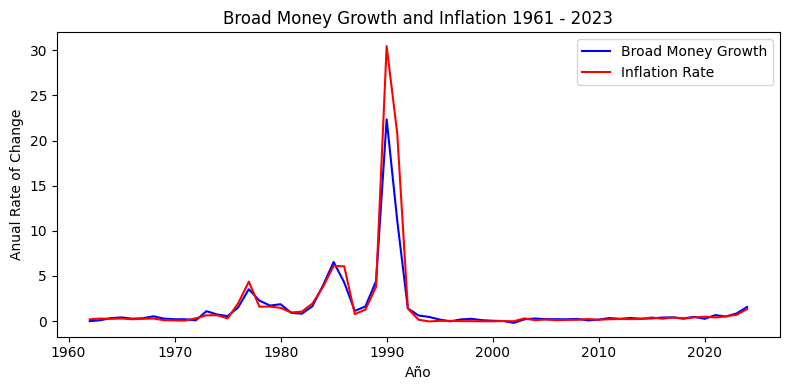

In [25]:
plt.figure(figsize=(8, 4))
plt.title('Broad Money Growth and Inflation 1961 - 2023')
plt.xlabel('Año')
plt.ylabel('Anual Rate of Change')

# Graficar las líneas temporales para M0, M1, M2 y M3
plt.plot(df_arc['year'], df_arc['Broad_Money'], color='b', label='Broad Money Growth')
plt.plot(df_arc['year'], df_arc['Inflation'], color='r', label='Inflation Rate')


# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [26]:
df_arc.head()

,year,GDP_Current,GDP_Constant,Broad_Money,Inflation,Velocity_Money
0,1961-12-31,0.268410,0.054278,-0.003597,0.203107,0.272007
1,1962-12-31,0.277738,-0.008520,0.101083,0.288718,0.176655
2,1963-12-31,0.189245,-0.053082,0.331148,0.255912,-0.141902
3,1964-12-31,0.418199,0.101303,0.413793,0.287746,0.004406
4,1965-12-31,0.340466,0.105694,0.270035,0.212329,0.070431
